<h1>Importing neccessary libraries</h1>

1. Importing neccessary libraries
   - **Pandas**: Used to handle and manipulate tabular data, like reading and cleaning datasets (e.g., CSV files).
   - **NumPy**: Supports working with large arrays and matrices.
   - **Pickle**: Saves and loads Python objects, such as trained models, for later use.
   - **Matplotlib**: Creates visualizations like plots and charts to analyze data and model performance.
   - **Seaborn**: Makes it easy to create attractive statistical graphics, such as heatmaps and distribution plots.
   - **Regular Expressions (re)**: Helps find patterns in text, useful for cleaning or extracting data.
   - **Natural Language Toolkit (nltk)**: Processes text data, such as splitting text into words, stemming, and removing common words.
   - **TensorFlow and Keras**: Used for building and training machine learning models, with Keras providing a simpler interface.
   - **Scikit-learn (Sklearn)**: Used for tasks like data preprocessing, feature extraction, and model evaluation.
   - **BeautifulSoup**: Extracts data from web pages, useful for gathering text from online sources.
   - **PyTorch**: Builds and trains deep learning models with utilities for neural networks and optimization.
   - **DataLoader and TensorDataset**: Helps in PyTorch to load and batch data during model training.
   - **Jupyter Notebook**: An interactive environment for writing and running Python code.


In [2]:
# Install necessary libraries for deep learning, text processing, and visualization
!pip install tensorflow transformers torch torchvision
!pip install beautifulsoup4 nltk seaborn

# Import essential libraries for data manipulation, numerical operations, and visualization
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim

# Import scikit-learn modules for model evaluation and text processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from torch.utils.data import DataLoader, TensorDataset

# Stopwords are to remove common words from text processing
# Punkt: Tokenizer models to split text into words or sentences
nltk.download('stopwords')
nltk.download('punkt')

# Stemming reduces words to their root forms (e.g., "running" becomes "run")
stemmer = PorterStemmer()

# Load the set of English stopwords for filtering out common words that may not add value to the model
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The code uses pandas to read two CSV files, True.csv and Fake.csv, which contains news articles labeled as 'true' or 'fake', respectively. pd.read_csv() reads these files into two separate DataFrames, true_df and false_df.

Next, labels are added to each DataFrame to indicate the class of the news: 1 for true and 0 for fake. This is done by assigning the value 1 to the column label in true_df and 0 to false_df.

The two DataFrames are then combined into a single DataFrame df using pd.concat(). This method concatenates the DataFrames along a particular axis—in this case, vertically—while ignore_index=True ensures that the index is reset to a default integer range.

Finally, to ensure the model training is robust, the combined DataFrame is randomized with df.sample(frac=1, random_state=42). This function shuffles the rows of the DataFrame, and reset_index(drop=True) is used to reset the index of the shuffled DataFrame. The random_state=42 argument ensures that the shuffling is reproducible.

In [4]:
# Load datasets
true_df = pd.read_csv('True.csv')
false_df = pd.read_csv('Fake.csv')

# Add labels to the datasets
# Assign label '1' to true news articles
true_df['label'] = 1
# Assign label '0' to fake news articles
false_df['label'] = 0

# Combine the true and fake news datasets into a single DataFrame
df = pd.concat([true_df, false_df], ignore_index=True)

# Randomize the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

<h1>2. Text Preprocessing</h1>
The text preprocessing function is designed to clean and prepare the text data for analysis. The function first checks if the input text is a string. If not, it returns an empty string. It then removes non-alphanumeric characters and converts the text to lowercase, ensuring uniformity across the dataset. The function also removes common English stopwords, which are words that do not contribute much meaning, using NLTK's stopword list. HTML tags are stripped from the text using BeautifulSoup, and any remaining non-alphanumeric characters and digits are removed. The cleaned text is then stored in a new text column, combining the processed title and text columns of the original DataFrame. This preprocessing step is essential for transforming raw text into a structured format that can be used effectively in machine learning models.

In [6]:
# Function to evaluate the performance of different models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Model Evaluation:")
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    # Generate a confusion matrix to understand the distribution of predictions
    cm = confusion_matrix(y_true, y_pred)
    # Generate a detailed classification report showing precision, recall, and F1-score
    report = classification_report(y_true, y_pred)
    # Display the accuracy of the model
    print(f'Accuracy: {accuracy:.4f}')
    print('Confusion Matrix:')
    print(cm)
    
    # Display the classification report
    print('Classification Report:')
    print(report)
    print("\n")
    
    # Visualize the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.xlabel('Predicted')  
    plt.ylabel('True')      
    plt.title(f'{name} Confusion Matrix')  
    plt.show()

In [7]:
# Function to preprocess the text data
def preprocess_text(text):
    # Check if the input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ''
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)    
    # Convert all characters to lowercase
    text = text.lower()
    # Remove stopwords from the text, split text into words, remove words in stop_words set and join them back into a string
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove any HTML tags from the text
    text = BeautifulSoup(text, "html.parser").get_text()  
    # Remove non-alphanumeric characters from the cleaned text
    text = re.sub(r'\W', ' ', text)
    # Remove digits from text
    text = re.sub(r'\d', '', text)
    # Return the cleaned text
    return text

# Apply the preprocessing function to the dataset
df['text'] = df['title'].apply(preprocess_text) + " " + df['text'].apply(preprocess_text)
# Ensure the 'label' column is of integer type
df['label'] = df['label'].astype(int)

<h1>3. Data Splitting</h1>
The dataset is split into training and validation sets to prepare for model training. The train_test_split function from Scikit-learn is used for this purpose, with a 60-40 split between the training and validation sets. Stratification is applied to ensure that the label distribution is consistent across both sets, which is important for maintaining the integrity of the model's learning process. Following this, the text data is vectorized using the TfidfVectorizer, which converts the textual data into numerical features. The vectorizer is configured to use both unigrams and bigrams, capturing both single words and pairs of words. The number of features is capped at 10,000 to manage computational efficiency. The dimensionality of the data is further reduced using TruncatedSVD, which condenses the feature space into 300 principal components. This helps in speeding up the training process and avoids the curse of dimensionality, ensuring the data is in a manageable format for the machine learning model.

In [9]:
# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['label'])

# Text vectorization using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
# Dimensionality reduction using Truncated SVD (Latent Semantic Analysis)
lsa = TruncatedSVD(n_components=300)

# Fit the vectorizer to the training data and transform the training text data into TF-IDF features
x_train_tfidf = vectorizer.fit_transform(train_df['text'])
# Transform the validation text data using the fitted vectorizer
x_val_tfidf = vectorizer.transform(val_df['text'])
# Apply dimensionality reduction to the training data
x_train = lsa.fit_transform(x_train_tfidf)
# Apply the same dimensionality reduction to the validation data
x_val = lsa.transform(x_val_tfidf)
# Extract the labels for the training and validation sets
y_train = train_df['label'].values
y_val = val_df['label'].values


<h1>4. Model Definition - Keras</h1>
4. Model Definition
A neural network model is defined using Keras, designed to handle the binary classification task. The model consists of several dense layers, each followed by a dropout layer to mitigate the risk of overfitting. The ReLU activation function is used in the dense layers, making the model capable of learning complex patterns in the data. The l2 regularization is applied to the dense layers to further control overfitting by penalizing large weights. The final layer of the model uses a sigmoid activation function, which is appropriate for binary classification tasks. The model is compiled using the Adam optimizer, binary cross-entropy as the loss function, and accuracy as a performance metric. Class weights are calculated to handle any imbalance in the training data, ensuring that the model does not become biased toward the majority class. The model is trained for 10 epochs with a batch size of 64, utilizing early stopping to prevent overfitting if the validation loss stops improving.

In [11]:
# Define the Keras model
keras_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
keras_model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])


In [12]:
# Calculate class weights
class_weights = {
    0: len(y_train) / (2 * sum(y_train == 0)),
    1: len(y_train) / (2 * sum(y_train == 1))
}

In [13]:
# Train the model
history = keras_model.fit(x_train, y_train, 
                          epochs=10,
                          batch_size=64, 
                          validation_data=(x_val, y_val),
                          class_weight=class_weights,
                          callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3, restore_best_weights=True)])


Epoch 1/10


421/421 [==============================] - 3s 4ms/step - loss: 0.2939 - accuracy: 0.9356 - val_loss: 0.1236 - val_accuracy: 0.9869
Epoch 2/10
421/421 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9838 - val_loss: 0.1052 - val_accuracy: 0.9842
Epoch 3/10
421/421 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9854 - val_loss: 0.0905 - val_accuracy: 0.9866
Epoch 4/10
421/421 [==============================] - 1s 2ms/step - loss: 0.0944 - accuracy: 0.9847 - val_loss: 0.0899 - val_accuracy: 0.9852
Epoch 5/10
421/421 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9850 - val_loss: 0.0873 - val_accuracy: 0.9849
Epoch 6/10
421/421 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9850 - val_loss: 0.0864 - val_accuracy: 0.9854
Epoch 7/10
421/421 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9848 - val_loss: 0.0863 - val_accuracy: 0.9838
Epoc

<h1>5.1. Model Evaluation - Keras</h1>
The model's performance is evaluated using the validation set. The evaluation includes the calculation of validation loss and accuracy, which provide insights into how well the model generalizes to unseen data. Predictions are made on the validation set, and these predictions are then compared to the true labels to calculate the accuracy. A confusion matrix is generated to visualize the model's performance in distinguishing between the two classes. The confusion matrix is an essential tool for understanding the types of errors the model makes, whether it confuses one class for the other. Additionally, a classification report is generated, providing detailed metrics such as precision, recall, and F1-score for each class. The confusion matrix is visualized using a heatmap, offering a clear and intuitive view of the model's classification performan

In [15]:
# Evaluate the Keras model
val_loss, val_accuracy = keras_model.evaluate(x_val, y_val)
print(f'Keras Model Validation Accuracy: {val_accuracy:.4f}')

562/562 [==============================] - 0s 808us/step - loss: 0.0780 - accuracy: 0.9872
Keras Model Validation Accuracy: 0.9872


In [16]:
# Make predictions
y_val_pred_probs = keras_model.predict(x_val)
y_val_pred_keras = (y_val_pred_probs > 0.5).astype(int).flatten()

562/562 [==============================] - 1s 762us/step


Keras Neural Network Model Evaluation:
Accuracy: 0.9872
Confusion Matrix:
[[9242  151]
 [  78 8489]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9393
           1       0.98      0.99      0.99      8567

    accuracy                           0.99     17960
   macro avg       0.99      0.99      0.99     17960
weighted avg       0.99      0.99      0.99     17960





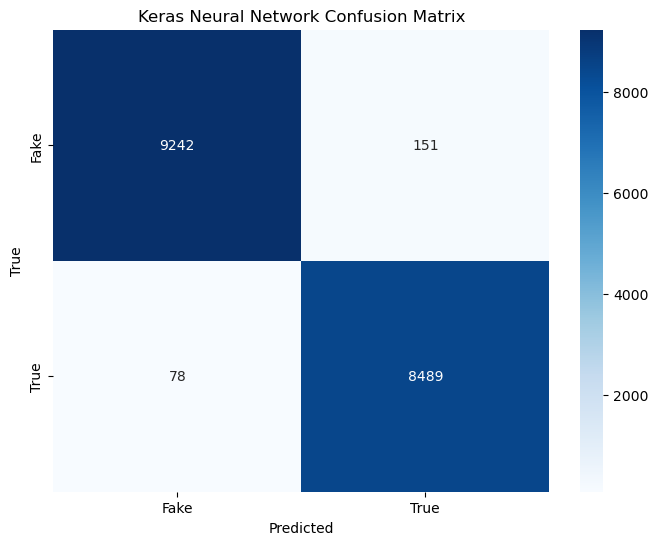

In [17]:
# Evaluate the Model and show the accuracy as well as the confusion matrix
evaluate_model("Keras Neural Network", y_val, y_val_pred_keras)

<h1>5.2. Model Evaluation - SVM, Logistic Regression, Random Forest</h1>
<h3>SVM</h3>
The SVM model is initialized with a linear kernel, class_weight='balanced', and probability=True to handle class imbalance and enable probability estimates. It is trained on the training data using svm_model.fit(x_train, y_train). Evaluation is conducted with the evaluate_model function, which provides accuracy, confusion matrix, and classification report to assess the model's performance on the validation set.

<h3>Logistic Regression</h3>
The Logistic Regression model is configured with class_weight='balanced' to address class imbalance and max_iter=10000 to ensure convergence. It is trained on the training data with logistic_model.fit(x_train, y_train). The model’s performance is evaluated using the evaluate_model function, which reports accuracy, confusion matrix, and classification metrics on the validation set.

<h3>Random Forest</h3>
The Random Forest model is set with 100 trees (n_estimators=100), class_weight='balanced', and a fixed random seed (random_state=42). It is trained using random_forest_model.fit(x_train, y_train). The model’s performance is assessed using the evaluate_model function, which provides accuracy, confusion matrix, and classification report for the validation data.

SVM Model Evaluation:
Accuracy: 0.9871
Confusion Matrix:
[[9242  151]
 [  80 8487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9393
           1       0.98      0.99      0.99      8567

    accuracy                           0.99     17960
   macro avg       0.99      0.99      0.99     17960
weighted avg       0.99      0.99      0.99     17960





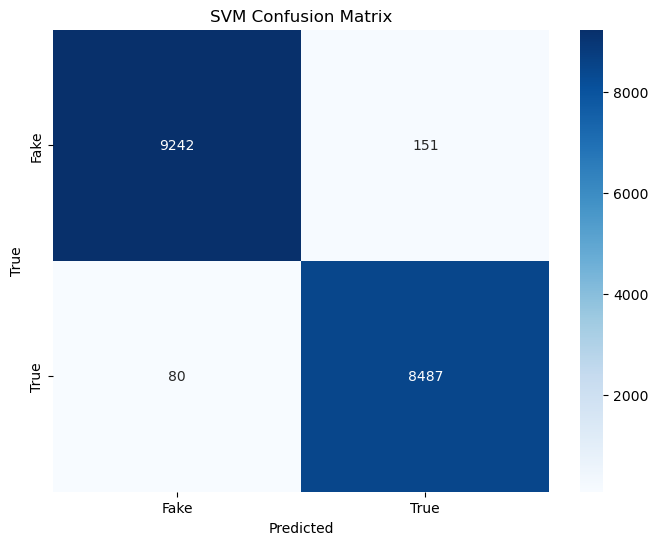

Logistic Regression Model Evaluation:
Accuracy: 0.9830
Confusion Matrix:
[[9186  207]
 [  99 8468]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9393
           1       0.98      0.99      0.98      8567

    accuracy                           0.98     17960
   macro avg       0.98      0.98      0.98     17960
weighted avg       0.98      0.98      0.98     17960





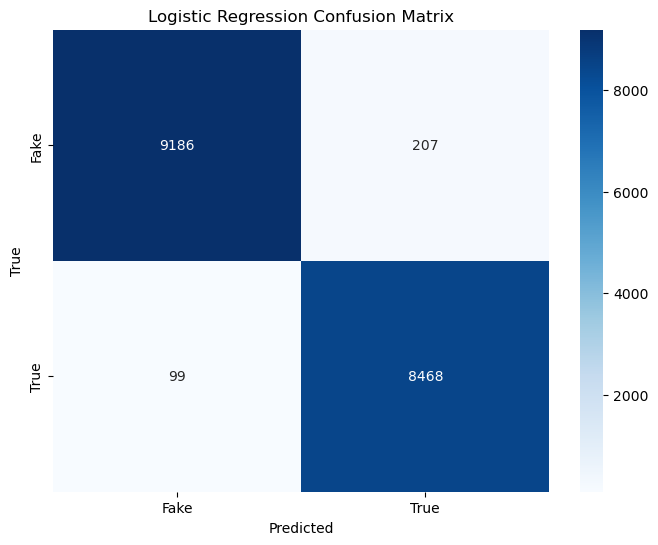

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_model.fit(x_train, y_train)
y_val_pred_svm = svm_model.predict(x_val)

# Evaluate SVM model
evaluate_model("SVM", y_val, y_val_pred_svm)

# Train the Logistic Regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000)
logistic_model.fit(x_train, y_train)
y_val_pred_logistic = logistic_model.predict(x_val)

# Evaluate Logistic Regression model
evaluate_model("Logistic Regression", y_val, y_val_pred_logistic)

# Train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
random_forest_model.fit(x_train, y_train)
y_val_pred_rf = random_forest_model.predict(x_val)

# Evaluate Random Forest model
evaluate_model("Random Forest", y_val, y_val_pred_rf)



<h1>5.3. Model - Pytorch </h1>

In [ ]:
# Convert the data to PyTorch tensors
# Convert training data to PyTorch tensors with the appropriate data type
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Unsqueeze adds an extra dimension to match the expected shape


# Convert validation data to PyTorch tensors
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Create TensorDataset
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

<h3>Model Definition - PyTorch:</h3>

In PyTorch, we define the model by subclassing nn.Module. The PyTorchModel class is initialized with layers and activation functions:
The model includes linear layers with ReLU activations and dropout layers to prevent overfitting. The output layer uses a sigmoid activation to produce a probability score for binary classification.

In [ ]:
# Define the PyTorch model
# This is a custom neural network model built using the PyTorch library
class PyTorchModel(nn.Module):
    def __init__(self, input_dim):
        super(PyTorchModel, self).__init__()
        
        # Define the first fully connected layer
        self.fc1 = nn.Linear(input_dim, 256)
        # Define the ReLU activation function for the first hidden layer
        self.relu1 = nn.ReLU()
        # Add a dropout layer with a 40% dropout rate to reduce overfitting
        self.dropout1 = nn.Dropout(0.4)
        # Define the second fully connected layer
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.4)
        # Define the third fully connected layer
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        # Define the output layer
        self.fc4 = nn.Linear(64, 1)
        # Apply the sigmoid activation function to the output, which outputs a probability value between 0 and 1
        self.sigmoid = nn.Sigmoid()

    # Define the forward pass through the network
    def forward(self, x):
        # Pass the input through the first layer, followed by ReLU and dropout
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        # Pass the result through the second layer, followed by ReLU and dropout
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        # Pass the result through the third layer, followed by ReLU
        x = self.fc3(x)
        x = self.relu3(x)
        # Pass the result through the output layer and apply sigmoid activation
        x = self.fc4(x)
        x = self.sigmoid(x)
        # Return the final output
        return x

<h3> Model Training and evaluation - PyTorch:</h3>

The model is instantiated with the input dimension and is trained using nn.BCELoss() for the loss function and optim.Adam as the optimizer. During training, the model processes data in batches, updating weights using backpropagation. After training, the model switches to evaluation mode to make predictions on the validation set, which are then aggregated to compute accuracy.
The evaluate_model function is used to assess the PyTorch model’s performance. Predictions are compared to true labels from the validation set, and metrics such as accuracy, confusion matrix, and classification report are generated to evaluate the model’s effectiveness. This provides a clear view of how well the model performs in binary classification tasks.

In [ ]:
# Instantiate the PyTorch model, loss function, and optimizer

# Determine the input dimension from the training data
input_dim = x_train.shape[1]
# Instantiate the PyTorch model with the determined input dimension
pytorch_model = PyTorchModel(input_dim)
# Define the loss function for binary classification
criterion = nn.BCELoss()
# Define the optimizer using Adam optimizer to train the model
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)

# Training the PyTorch model

# Set the number of epochs for training
n_epochs = 10
for epoch in range(n_epochs):
    # Set the model to training mode
    pytorch_model.train()
    # Iterate over batches of data from the DataLoader
    for x_batch, y_batch in train_loader:
        # Zero the gradients to prevent accumulation from previous steps
        optimizer.zero_grad()
        # Forward pass
        y_pred = pytorch_model(x_batch)    
        # Compute the loss based on predicted and actual labels
        loss = criterion(y_pred, y_batch)
        # Backward pass
        loss.backward()    
        # Update the model parameters based on the gradients
        optimizer.step()
        
    # Validation after each epoch
    pytorch_model.eval()
    
    # List to store predictions for the validation set
    y_val_pred = []
    
    # Disable gradient calculation for validation to save memory and computation
    with torch.no_grad():
        # Iterate over batches of validation data
        for x_batch, _ in val_loader:
            # Predict the output for the validation batch
            y_batch_pred = pytorch_model(x_batch)
            # Append predictions to the list
            y_val_pred.append(y_batch_pred)
            
    # Concatenate all predictions into a single tensor
    y_val_pred = torch.cat(y_val_pred)
    # Convert predictions to binary labels (0 or 1) using a threshold of 0.5
    y_val_pred_pytorch = (y_val_pred > 0.5).int().flatten().numpy()
    # Calculate validation accuracy for this epoch
    val_accuracy = accuracy_score(y_val, y_val_pred_pytorch)
    print(f'Epoch {epoch+1}/{n_epochs}, PyTorch Model Validation Accuracy: {val_accuracy:.4f}')

# Evaluate the PyTorch model
evaluate_model("PyTorch Neural Network", y_val, y_val_pred_pytorch)

<h1>6. Saving Preprocessing and Model Artifacts for Reuse</h1>
This portion is where the machine learning preprocessing component is being saved along a trained model. First, it serializes a TfidfVectorizer instance to a file named vectorizer.pkl using Python's pickle module, allowing the vectorizer to be loaded laterwithout being retrained. and reused without retraining. The next portion is where the, the trained model and its tokenizer are saved to a directory called saved_model using the model's built-in save method. This allows the model to be loaded later for inference or further training.

In [ ]:
# Save the TfidfVectorizer instance
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Vectorizer saved")

with open('lsa_model.pkl', 'wb') as f:
    pickle.dump(lsa, f)

print("lsa_model saved")
    
# Save the fine-tuned model and tokenizer
keras_model.save('saved_model')

print("model saved")